# Setup

In [ ]:
!pip install fastai==2.7.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive

#you will have to change this for your own folder
drive.mount('/content/drive')
%cd /content/drive/My Drive

Mounted at /content/drive
/content/drive/My Drive


# Data processing

In [ ]:
import pandas as pd
from fastai.vision.all import *

In [ ]:
labels_df = pd.read_csv('data/labels.csv')
print(labels_df)

   label_id    object
0        l0    people
1        l1     trees
2        l2     grass
3        l3  building
4        l4      snow
..      ...       ...
87      l87     stage
88      l88      book
89      l89     books
90      l90      flag
91      l91      pole

[92 rows x 2 columns]


In [ ]:
from os import listdir

def remove_invalid(df):
  file_names = listdir('data/images')
  return df[df['image_id'].str.startswith('imagenet_images') | df['image_id'].isin(file_names)]

In [ ]:
train_df = pd.read_csv('data/train_new.csv')
train_df = remove_invalid(train_df)

train_db = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                     splitter=ColSplitter(),
                     get_x=ColReader(0, pref="data/images/"),
                     get_y=ColReader(1, label_delim=' '),
                     item_tfms=Resize(224, 'crop'), # 224
                     batch_tfms=aug_transforms())
print(train_df)
dls = train_db.dataloaders(train_df, bs=64)

                                            image_id  \
0                                         img256.jpg   
1                                          img98.jpg   
2                                         img147.jpg   
3                                         img254.jpg   
4                                         img160.jpg   
...                                              ...   
5003  imagenet_images/pole/2088202989_26b0990241.jpg   
5004   imagenet_images/pole/412508235_1561e62e07.jpg   
5005  imagenet_images/pole/2693365433_1601b3177c.jpg   
5006   imagenet_images/pole/371927597_7f83152e86.jpg   
5007                                       dummy.jpg   

                                                                                                                                                                                                                                                                                                                                       

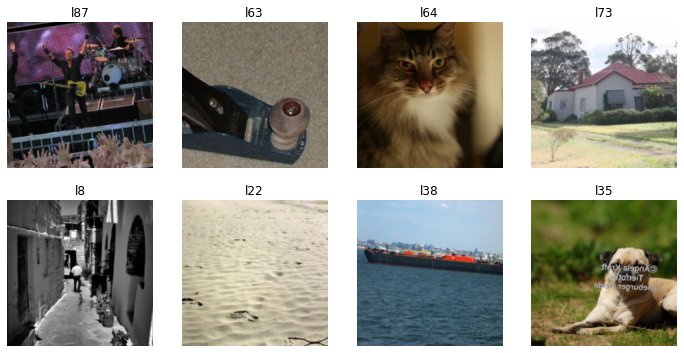

In [ ]:
dls.show_batch(max_n=8, figsize=(12,6))

In [ ]:
test_df = pd.read_csv('data/test.csv')
print(test_df)

      image_id
0   img102.jpg
1   img103.jpg
2    img11.jpg
3   img113.jpg
4   img114.jpg
..         ...
83   img81.jpg
84   img84.jpg
85   img90.jpg
86   img93.jpg
87   img94.jpg

[88 rows x 1 columns]


# The good stuff

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy_multi, loss_func=BCEWithLogitsLossFlat(), splitter=default_split).to_fp16()

In [ ]:
learn.fine_tune(15)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.018717,0.359034,0.954683,00:41


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.016643,0.362216,0.955008,00:40
1,0.016127,0.362861,0.954467,00:41
2,0.015885,0.381041,0.954413,00:40
3,0.014507,0.384012,0.954467,00:41
4,0.013991,0.396226,0.954575,00:39
5,0.013069,0.403527,0.954196,00:41
6,0.011828,0.416516,0.954575,00:40
7,0.010923,0.422134,0.954575,00:41
8,0.010317,0.425160,0.954413,00:40
9,0.009609,0.429176,0.954251,00:40


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.016643,0.362216,0.955008,00:40
1,0.016127,0.362861,0.954467,00:41
2,0.015885,0.381041,0.954413,00:40
3,0.014507,0.384012,0.954467,00:41
4,0.013991,0.396226,0.954575,00:39
5,0.013069,0.403527,0.954196,00:41
6,0.011828,0.416516,0.954575,00:40
7,0.010923,0.422134,0.954575,00:41
8,0.010317,0.425160,0.954413,00:40
9,0.009609,0.429176,0.954251,00:40


image_id    img84.jpg
Name: 84, dtype: object


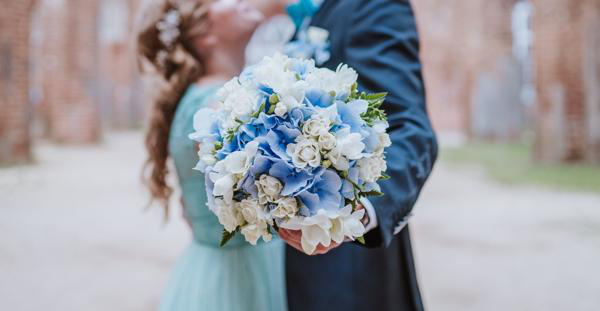

In [ ]:
img_series = test_df.sample().iloc[0]
img_path = 'data/images/' + img_series['image_id']
img = load_image(img_path)
print(img_series)
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img_path)
list(map(lambda label: labels_df.loc[labels_df['label_id'] == label], pred_class))

[   label_id   object
 60      l60  wedding]